# MNS - Biological Plausible Deep Learning

In [ ]:
!pip install -r requirements.txt --quiet

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Import Packages
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import tensorflow as tf

# Import Network Architectures
from DNN import DNN, train_dnn_model
from CNN import CNN, train_cnn_model

# Import log-helper/learning plot functions
import matplotlib.pyplot as plt
from logger import get_latest_log_fname, process_logger

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    print("Torch Device: {}".format(torch.cuda.get_device_name(0)))
else:
    print("Torch Device: Local CPU")
    
# Remove files in log dir
log_dir = os.getcwd() + "/logs"
if not os.path.exists(log_dir):
    os.makedirs(directory)
    print("Created New Log Directory")
else:
    filelist = [ f for f in os.listdir(log_dir) if f.endswith(".bak") ]
    for f in filelist:
        os.remove(os.path.join(mydir, f))
    print("Deleted Old Files in Existing Log Directory")

# Define batchsize for data-loading
batch_size = 100

Torch Device: Local CPU
Deleted Old Files in Existing Log Directory


In [4]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                             train=True, 
                                             transform=transforms.ToTensor(),  
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                            train=False, 
                                            transform=transforms.ToTensor())

# Simple Feedforward Neural Net

In [5]:
# Feedforward Neural Network Parameters
h_sizes = [784, 500]
out_size = 10
num_epochs = 5
learning_rate = 0.001

# Instantiate the model with layersizes, Loss fct, optimizer
dnn_model = DNN(h_sizes, out_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dnn_model.parameters(), lr=learning_rate)

Linear(in_features=784, out_features=500, bias=True)
ReLU()
Linear(in_features=500, out_features=10, bias=True)


In [6]:
train_dnn_model(dnn_model, num_epochs,
                train_loader, test_loader,
                device, optimizer, criterion,
                model_fname ="models/mnist_dnn.ckpt",
                verbose=True, logging=True)

Epoch [1/5], Step [100/600], Loss: 0.2771, Train Acc: 0.91, Test Acc: 0.91
Epoch [1/5], Step [200/600], Loss: 0.2716, Train Acc: 0.93, Test Acc: 0.93
Epoch [1/5], Step [300/600], Loss: 0.2382, Train Acc: 0.91, Test Acc: 0.94
Epoch [1/5], Step [400/600], Loss: 0.2172, Train Acc: 0.92, Test Acc: 0.94
Epoch [1/5], Step [500/600], Loss: 0.2117, Train Acc: 0.97, Test Acc: 0.95
Epoch [1/5], Step [600/600], Loss: 0.1858, Train Acc: 0.92, Test Acc: 0.96
Epoch [2/5], Step [100/600], Loss: 0.0579, Train Acc: 0.98, Test Acc: 0.96
Epoch [2/5], Step [200/600], Loss: 0.1309, Train Acc: 0.98, Test Acc: 0.96
Epoch [2/5], Step [300/600], Loss: 0.1481, Train Acc: 0.96, Test Acc: 0.97
Epoch [2/5], Step [400/600], Loss: 0.1049, Train Acc: 0.95, Test Acc: 0.97
Epoch [2/5], Step [500/600], Loss: 0.1011, Train Acc: 0.96, Test Acc: 0.96
Epoch [2/5], Step [600/600], Loss: 0.1744, Train Acc: 0.95, Test Acc: 0.97
Epoch [3/5], Step [100/600], Loss: 0.0798, Train Acc: 0.97, Test Acc: 0.97
Epoch [3/5], Step [200/60

In [7]:
log_fname = get_latest_log_fname(log_dir)
iterations, losses, train_accuracies, test_accuracies = process_logger(log_fname)

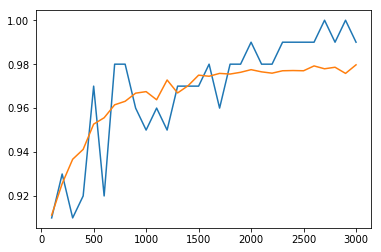

In [17]:
plt.plot(iterations, train_accuracies)
plt.plot(iterations, test_accuracies)

# Simple Convolutional Neural Network

In [ ]:
# ConvNet Parameters
ch_sizes = [1, 16, 32]
k_sizes = [5, 5]
stride = 1
padding = 2
out_size = 10
num_epochs = 5
learning_rate = 0.001

# Instantiate the model with layersizes, Loss fct, optimizer
cnn_model = CNN(ch_sizes, k_sizes,
                stride, padding, out_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=learning_rate)

In [ ]:
train_cnn_model(cnn_model, num_epochs,
                train_loader, test_loader,
                device, optimizer, criterion,
                model_fname ="models/temp_model_cnn.ckpt",
                verbose=True, logging=True)

## Guergiev et al (2017)